In [940]:
import sys
sys.path.insert(0, './vis/python')
import athena_read as ath 
import h5py
import matplotlib.pyplot as plt
import numpy as np
from array import array

data = ath.athdf("NGC5129.user.01200.athdf")
prim = ath.athdf("NGC5129.prim.01200.athdf")

In [941]:
radius_tmp = prim['x1v']
theta_tmp = prim['x2v']
smass = data['user_out_var3']

### Save upper lower 4 rows to file

In [942]:
updown4 = smass[0][13:17][:]
massArray = array('f', [item for sublist1 in updown4 for item in sublist1])
outputFile = open('massData', 'wb')
massArray.tofile(outputFile)
outputFile.close()

### Reproduce x1v and x2v including ghost cells

In [943]:
theta=[]
theta.append(6.2833767796342352e-02)
theta.append(1.1666194923093506e-01)
for item in theta_tmp:
    theta.append(item)
theta.append(3.0249282139086842e+00)
theta.append(3.0787641928985394e+00)    

In [944]:
radius=[]
radius.append(2.1472816004449802e-03)
radius.append(2.3816359872343624e-03)
for item in radius_tmp:
    radius.append(item)
radius.append(2.6289653479143954e+02)
radius.append(2.8918620527324964e+02)    

13-16

In [945]:
stellarMass=np.zeros((4,120))
for i in range(4):
    for j in range(120):
        stellarMass[i][j]=updown4[i][j]

In [946]:
def getKuzminParams(stellarMass):
    sumMass=np.zeros(120)
    for j in range(120):
        for i in range(4):
            sumMass[j]+=stellarMass[i][j];
            
    for idx in np.arange(1,120):
        sumMass[idx] += sumMass[idx-1]
        
    halfMass = sumMass[119] / 2
    
    for idx in range(120):
        if (sumMass[idx] <= halfMass):
            ihalfRadius = idx;
 
#    return halfMass, ihalfRadius
    return sumMass[119], radius[ihalfRadius+2]/np.sqrt(3);

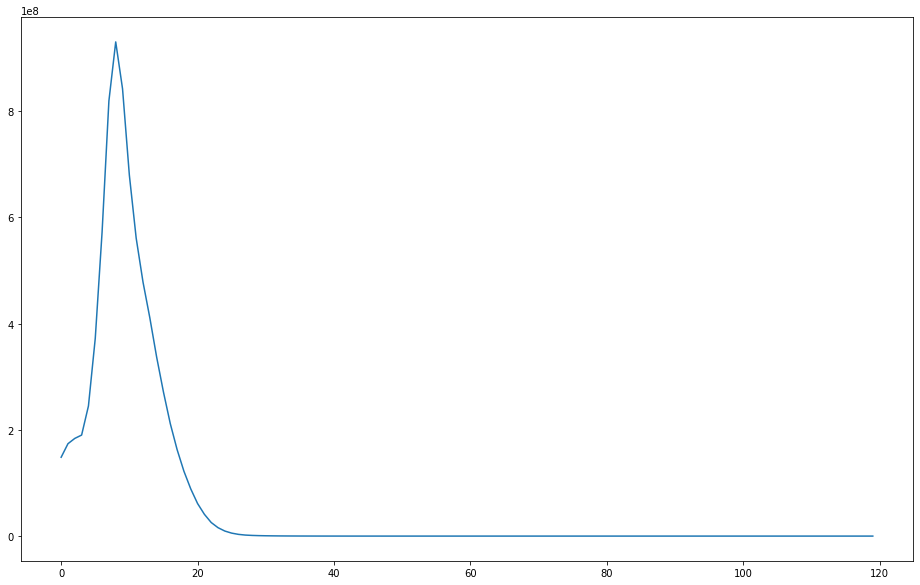

In [947]:
# getKuzminParams(stellarMass)
sumMass=np.zeros(120)
for j in range(120):
    for i in range(4):
        sumMass[j]+=stellarMass[i][j];
plt.figure(figsize=(16,10))
plt.plot(sumMass)

In [948]:
def getForce(G, M, a, i, j):
    _r = radius[i];
    _theta = theta[j];
    rsin = _r * np.sin(_theta);
    rcos = _r * np.cos(_theta);
    denom = (rsin**2 + (a + abs(rcos))**2)**1.5
    force_r = - G * M * (_r + a * abs(np.cos(_theta)))/denom;
    force_theta = G * M * a * rsin * abs(np.cos(_theta)) / rcos / denom
    return force_r, force_theta

In [949]:
theta[10], radius[10]

(0.95870525, 0.0058823135)

In [950]:
def getKuzminPotential(G, M, a, i, j):
    _r = radius[i];
    _theta = theta[j];
    rsin = _r * np.sin(_theta);
    rcos = _r * np.cos(_theta);
    denom = np.sqrt(rsin**2 + (abs(rcos)+a)**2)
    return - G * M / denom

In [951]:
Parsec = 3.0856e18
SolarMass = 1.9891e33
Year = 3.15367e7
lunit = 1e3 * Parsec
munit = 2.5e7 * SolarMass
tunit = 1e9 * Year
M = 4.8e9
a = 2.585777e-2
G = 6.67384e-8
guniv = G / ((lunit**3) / munit / tunit**2)

In [956]:
i = 17
j= 0

MM,aa = getKuzminParams(stellarMass)
fr, ft = getForce(guniv, MM, aa, i, j)
Phi = getKuzminPotential(guniv, MM, aa, i, j)

In [957]:
MM, aa, guniv, fr, ft, Phi

(7965316496.7098255,
 0.003396155268256391,
 112.35335168548728,
 -3955853084806533.0,
 56095240848179.02,
 -59502668350433.95)

In [963]:
original_stdout = sys.stdout
with open('test_force_python','w') as f:    
    sys.stdout = f
    for j in range(34):
        for i in range(124):
            frr, ftt = getForce(guniv, MM, aa, i, j)
            print("(%d, %d)  %4f  %4f" %(i,j,frr, ftt)) 
    sys.stdout = original_stdout
f.close()